In [1]:
import pandas as pd
import numpy as np

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/HR.csv")

In [3]:
df.isnull().mean()

satisfaction_level       0.000133
last_evaluation          0.000000
number_project           0.000000
average_monthly_hours    0.000000
time_spend_company       0.000000
Work_accident            0.000000
left                     0.000000
promotion_last_5years    0.000000
department               0.000000
salary                   0.000000
dtype: float64

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df['left'].value_counts()

0    11428
1     3574
Name: left, dtype: int64

In [6]:
df.left.value_counts(dropna=False)

0    11428
1     3574
Name: left, dtype: int64

## satisfaction_level

In [8]:
sl_s = df["satisfaction_level"]

In [9]:
# 是否为空值
sl_null = sl_s.isnull()

In [10]:
# 以TRUE为下标，找到为空的值
# df[df['satisfaction_level'].isnull()]
df[sl_null]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14999,NaN,0.52,2,158,3,0,1,0,support,low
15000,NaN,999999.00,2,158,3,0,1,0,sale,low


In [11]:
# 丢弃空值
sl_s = sl_s.dropna()

In [12]:
# 填充空值
sl_s = sl_s.fillna(1)

In [13]:
sl_s.describe()

count    15000.000000
mean         0.612839
std          0.248623
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [14]:
sl_s.skew() # 偏度

-0.47643761717258093

In [15]:
sl_s.kurt() # 峰度

-0.6706959323886252

In [17]:
%matplotlib inline

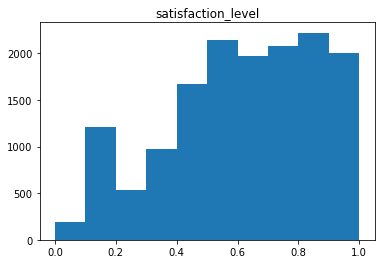

In [30]:
# 直方图示例
a, bins = np.histogram(sl_s.values, bins=np.arange(0.0,1.1,0.1))
plt.hist(sl_s.values, bins=bins)
plt.title('satisfaction_level')
plt.show()

## last_evaluation

In [32]:
le_s = df["last_evaluation"]

In [33]:
le_null = le_s[le_s.isnull()]

In [34]:
le_s.describe()

count     15002.000000
mean         67.373732
std        8164.407524
min           0.360000
25%           0.560000
50%           0.720000
75%           0.870000
max      999999.000000
Name: last_evaluation, dtype: float64

In [35]:
le_s.skew()

122.48265175204614

In [36]:
le_s.kurt()

15001.999986807796

In [37]:
le_s[le_s>1]

15000    999999.0
Name: last_evaluation, dtype: float64

In [38]:
# 异常值过滤
q_low = le_s.quantile(q=0.25) # 下四分位数
q_high = le_s.quantile(q=0.75) # 上四分位数
k = 1.5
q_interval = q_high - q_low

le_s = le_s[le_s<q_high+k*q_interval][le_s>q_low-k*q_interval]

In [39]:
len(le_s)

15001

In [40]:
le_s.describe()

count    15001.000000
mean         0.716068
std          0.171185
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

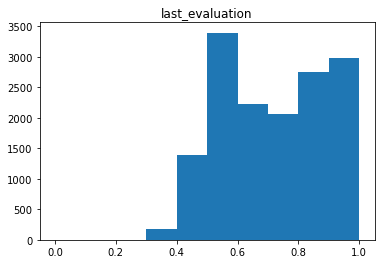

In [42]:
# 直方图示例
l_2, bins2 = np.histogram(le_s.values, bins=np.arange(0.0,1.1,0.1))
plt.hist(le_s.values, bins=bins2)
plt.title('last_evaluation')
plt.show()

## number project

In [43]:
np_s = df["number_project"]

In [44]:
np_null = np_s[np_s.isnull()]

In [45]:
np_s.describe()

count    15002.000000
mean         3.802693
std          1.232733
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

In [46]:
np_s.skew()

0.3377744235231047

In [47]:
np_s.kurt()

-0.49580962709450604

In [48]:
np_s.value_counts(dropna=False)

4    4365
3    4055
5    2761
2    2391
6    1174
7     256
Name: number_project, dtype: int64

In [49]:
np_s.value_counts(normalize=True)

4    0.290961
3    0.270297
5    0.184042
2    0.159379
6    0.078256
7    0.017064
Name: number_project, dtype: float64

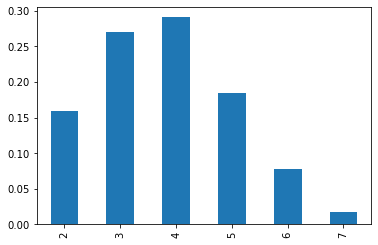

In [52]:
np_s.value_counts(normalize=True).sort_index().plot(kind='bar')

## average_montly_hours

In [54]:
amh_s = df["average_monthly_hours"]

In [59]:
amh_s.describe().to_dict()

{'count': 15002.0,
 'mean': 201.0417277696307,
 'std': 49.94181527437911,
 'min': 96.0,
 '25%': 156.0,
 '50%': 200.0,
 '75%': 245.0,
 'max': 310.0}

In [60]:
amh_s.skew()

0.05322458779916304

In [61]:
amh_s.kurt()

-1.1350158577565719

In [62]:
# 去除异常值
amh_s=amh_s[amh_s<amh_s.quantile(0.75)+1.5*(amh_s.quantile(0.75)-amh_s.quantile(0.25))][amh_s>amh_s.quantile(0.25)-1.5*(amh_s.quantile(0.75)-amh_s.quantile(0.25))]

In [63]:
interval = 10

(array([ 168.,  171.,  147.,  807., 1153., 1234., 1075.,  824.,  818.,
         758.,  751.,  738.,  856.,  824.,  987., 1002., 1045.,  935.,
         299.,  193.,  131.,   86.]),
 array([ 96, 106, 116, 126, 136, 146, 156, 166, 176, 186, 196, 206, 216,
        226, 236, 246, 256, 266, 276, 286, 296, 306, 316]),
 <a list of 22 Patch objects>)

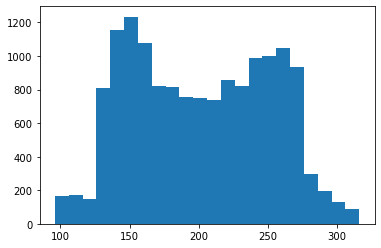

In [65]:
l_3, bins3 = np.histogram(amh_s.values, bins=np.arange(amh_s.min(), amh_s.max()+interval, interval))
plt.hist(amh_s.values, bins=bins3)

In [66]:
# 取在区间内时的数量
amh_s.value_counts(bins=np.arange(amh_s.min(), amh_s.max()+interval, interval))

(146.0, 156.0]     1277
(136.0, 146.0]     1159
(256.0, 266.0]     1063
(236.0, 246.0]     1006
(156.0, 166.0]      995
(246.0, 256.0]      987
(126.0, 136.0]      886
(216.0, 226.0]      873
(266.0, 276.0]      860
(166.0, 176.0]      832
(226.0, 236.0]      814
(176.0, 186.0]      813
(186.0, 196.0]      761
(196.0, 206.0]      755
(206.0, 216.0]      731
(276.0, 286.0]      319
(95.999, 106.0]     187
(286.0, 296.0]      164
(116.0, 126.0]      162
(106.0, 116.0]      162
(296.0, 306.0]      128
(306.0, 316.0]       68
Name: average_monthly_hours, dtype: int64

## Time Spend Company

In [67]:
tsc_s = df["time_spend_company"]

In [68]:
tsc_s.value_counts().sort_index()

2     3245
3     6445
4     2557
5     1473
6      718
7      188
8      162
10     214
Name: time_spend_company, dtype: int64

## Work Accident

In [69]:
wa_s = df["Work_accident"]

In [70]:
wa_s.value_counts()

0    12833
1     2169
Name: Work_accident, dtype: int64

## Left

In [71]:
l_s = df["left"]

In [72]:
l_s.value_counts()

0    11428
1     3574
Name: left, dtype: int64

## promotion last 5years

In [73]:
pl5_s = df["promotion_last_5years"]

In [74]:
pl5_s.value_counts()

0    14683
1      319
Name: promotion_last_5years, dtype: int64

## salary

In [75]:
s_s = df["salary"]

In [76]:
s_s.value_counts()

low       7318
medium    6446
high      1237
nme          1
Name: salary, dtype: int64

In [77]:
s_s = s_s.where(s_s!="nme")

In [78]:
s_s.value_counts()

low       7318
medium    6446
high      1237
Name: salary, dtype: int64

## department

In [79]:
d_s = df["department"]

In [80]:
d_s.value_counts()

sales          4140
technical      2720
support        2230
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
sale              2
Name: department, dtype: int64

In [81]:
d_s.value_counts(normalize=True)

sales          0.275963
technical      0.181309
support        0.148647
IT             0.081789
product_mng    0.060125
marketing      0.057192
RandD          0.052460
accounting     0.051127
hr             0.049260
management     0.041994
sale           0.000133
Name: department, dtype: float64

# 对比分析

In [86]:
df = df.dropna(how="any", axis=0) # 按行删除任意有空值的行

In [82]:
df = df[df["last_evaluation"]<=1][df["salary"]!="nme"][df["department"]!="sale"] # 去掉异常值

<ipython-input-82-b1d439e5fe2d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["last_evaluation"]<=1][df["salary"]!="nme"][df["department"]!="sale"] # 去掉异常值


In [83]:
len(df)

15000

In [84]:
sub_df_1 = df.loc[:, ["satisfaction_level", "department"]] # 取出两个值相关的数据

In [85]:
sub_df_1.groupby("department").mean()

,satisfaction_level
department,
IT,0.618142
RandD,0.619822
accounting,0.582151
hr,0.598809
management,0.621349
marketing,0.618601
product_mng,0.619634
sales,0.614447
support,0.618300


In [86]:
df.loc[:, ["left", "department"]].groupby("department").mean()

,left
department,
IT,0.222494
RandD,0.153748
accounting,0.265971
hr,0.290934
management,0.144444
marketing,0.236597
product_mng,0.219512
sales,0.244928
support,0.249327


In [87]:
sub_df_3 = df.loc[:, ["last_evaluation", "department"]]

In [88]:
sub_df_3.groupby("department", group_keys=False)

In [89]:
sub_df_3.groupby("department", group_keys=False)["last_evaluation"].apply(lambda x:x.max()-x.min())

department
IT             0.63
RandD          0.64
accounting     0.64
hr             0.63
management     0.63
marketing      0.64
product_mng    0.64
sales          0.64
support        0.64
technical      0.64
Name: last_evaluation, dtype: float64

In [90]:
df.groupby("department").mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723018,3.803139,200.739013,3.392825,0.154709,0.249327,0.008969


# 可视化

In [105]:
sns.set_style(style="darkgrid")# 配置样式
# sns.set_context(context="poster", font_scale=1) #配置字体
plt.figure(figsize=(30,16))
sns.set_palette(sns.color_palette("RdBu", n_colors=7)) # 配置色板

<Figure size 2160x1152 with 0 Axes>

### Salary 柱状图

In [99]:
np.arange(len(df["salary"].value_counts()))+0.25

array([0.25, 1.25, 2.25])

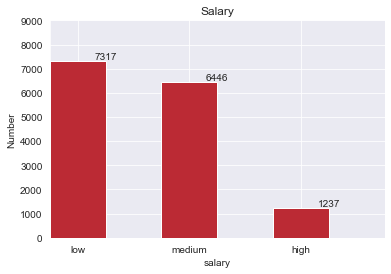

In [106]:
plt.title("Salary")
plt.bar(np.arange(len(df["salary"].value_counts()))+0.25, df["salary"].value_counts(), width=0.5)
plt.xticks(np.arange(len(df["salary"].value_counts()))+0.25, df["salary"].value_counts().index)
plt.axis([0,3,0,9000])
plt.xlabel("salary")
plt.ylabel("Number")
for x, y in zip(np.arange(len(df["salary"].value_counts()))+0.5, df["salary"].value_counts()):
    plt.text(x,y,y,ha="center", va="bottom")
# plt.ylim(0, 1500)
plt.show()


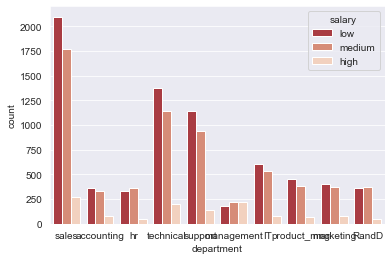

In [107]:
sns.countplot(x='department', hue='salary', data=df)
plt.show()

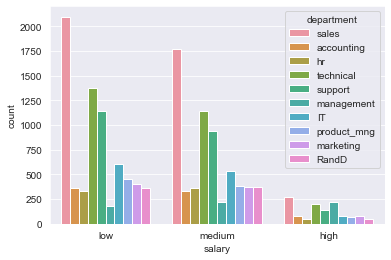

In [96]:
sns.countplot(x="salary", hue="department",data=df)
plt.show()

### 分布分析图

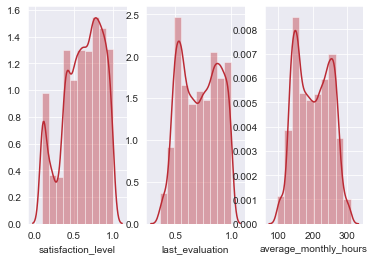

In [108]:
f = plt.figure(0)
f.add_subplot(1,3,1)
sns.distplot(df["satisfaction_level"], bins=10)
f.add_subplot(1,3,2)
sns.distplot(df["last_evaluation"], bins=10)
f.add_subplot(1,3,3)
sns.distplot(df["average_monthly_hours"], bins=10)
plt.show()

### 箱线图

In [109]:
?sns.boxplot

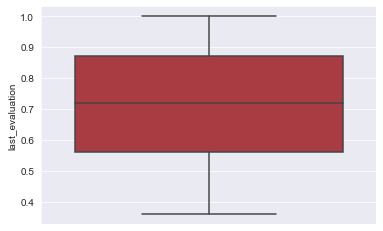

In [110]:
sns.boxplot(y=df["last_evaluation"], saturation=0.75)
plt.show()

### 折线图

In [111]:
sub_df=df.groupby("time_spend_company").mean()
sub_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,Work_accident,left,promotion_last_5years
time_spend_company,,,,,,,
2,0.697078,0.717596,3.687423,200.133169,0.172010,0.016338,0.016646
3,0.626314,0.668698,3.327592,186.628492,0.138889,0.246276,0.020795
4,0.467517,0.767927,4.627689,223.455221,0.124364,0.348064,0.013688
5,0.610305,0.813666,4.519348,222.978955,0.116090,0.565513,0.011541
6,0.603440,0.754875,4.213092,212.051532,0.149025,0.291086,0.023677
7,0.635957,0.682766,3.851064,200.744681,0.138298,0.000000,0.191489
8,0.665062,0.711975,3.777778,193.802469,0.271605,0.000000,0.061728
10,0.655327,0.731495,3.682243,199.224299,0.233645,0.000000,0.074766


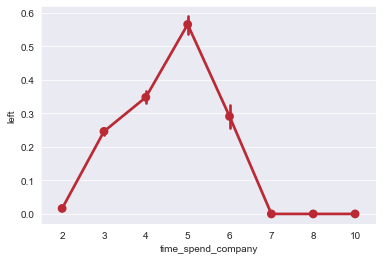

In [112]:
sns.pointplot(x="time_spend_company", y="left", data=df)
plt.show()

### 饼图

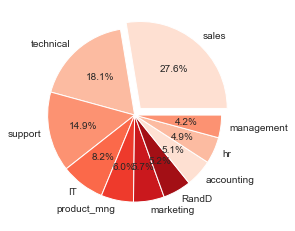

In [113]:
lbs = df["department"].value_counts().index
explodes = [0.1 if i == "sales" else 0 for i in lbs]
plt.pie(df["department"].value_counts(normalize=True), explode=explodes, autopct='%1.1f%%',colors=sns.color_palette("Reds", n_colors=7), labels=df["department"].value_counts().index)
plt.show()